# ATENÇÃO, A ATIVIDADE DA AULA 9 (FINAL) ESTÁ NA CELULA 31 DE PYTHON, LOCALIZADA NO FINAL DO ARQUIVO, REUTILIZEI AS AULAS ANTERIORES PARA JA TER OS DADOS PROCESSADOS ANTERIORMENTE

#### Será copiado alguns processamentos de dados já feitos, mas os que foram deixados em branco serão completador eventualmente


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/Carlos Eduardo/Desktop/Curso-Lapisco/curso-lapisco/Aula_08/train.csv', encoding = "ISO-8859-1")

#### Rápida descrição dos dados

##### O dicionário dos dados, descrevendo o qeu cada coluna significa/representar

In [3]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


#### Número de linhas e colunas

In [4]:
print(f"(Numero de linhas, Numero de colunas) - {df.shape}")

(Numero de linhas, Numero de colunas) - (891, 12)


#### Informações sobre o DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Colunas Presentes


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Verificando os nulos/faltantes

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### A coluna Cabin tem muitos Nulos, a coluna Age tem alguns e a coluna Embarked tem um valor insignificante de nulos

# Coluna Age Tratamento

In [8]:
print(f"media da coluna Age: {df['Age'].mean()}")
#Substitui todos os valores nulos pela média da coluna
df = df.fillna({"Age":df["Age"].mean()})

media da coluna Age: 29.69911764705882


# Coluna Cabin Tratamento

#### Por ter uma quantidade de 6 dados nulos para 8 não nulos e não ter uma grande importância para o dataset, a coluna será removida

In [9]:
df.drop('Cabin', axis=1, inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# Tratamento da coluna Embarked
#### Como só tem 2 valores não-nulos vamos substituir ambos pela moda (valor que mais aparece) da coluna

In [10]:
print(f"media da coluna Embarked: {df['Embarked'].mode()}")
df = df.fillna({"Embarked":df["Embarked"].mode()[0]})

media da coluna Embarked: 0    S
Name: Embarked, dtype: object


# Análise Estatística dos dados


In [11]:
#Variáveis numéricas
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Considerações a respeito das variáveis numéricas:

- Idade: A média das idades do dataset é na faixa dos 29/30 anos, tendo uma pessoa de 0.4 anos (???) e a pessoa mais velha tendo 80 anos.
- Nº de irmãos ou conjuges a bordo: Existe uma pessoa que está viajando com mais 8 pessoas, entre irmãos e conjuges.
- Nº de parentes ou crianças: Existe uma pessoa que está viajando com mais 8 parentes, podendo se ter, dentre esses 8, alguma criança.
- Tarifa: A média no valor da tarifa girava em torno de 32,20 (Libras?), segundo a linha 'mínimo' pode ser que alguma pessoa viajou de graça, o que pode ser -  impossível, e a pessoa que pagou mais caro pagou algo em torno de 512,32(Libras?)

#### Para variáveis categóricas vou desconsiderar a coluna nome e ticket pois os valores não são muito explicitativos para so dados que quero retornar

In [12]:
#Variáveis categóricas


#Crosstab de Embarked com Sex
cross_tab = pd.crosstab(df['Embarked'], df['Sex'])
print(cross_tab)

# Análise da frequëncia cruzada entre a quantidade de pessoas de sexo diferente que embarcou de diferentes cidades
cross_tab.describe()


Sex       female  male
Embarked              
C             73    95
Q             36    41
S            205   441


Sex,female,male
count,3.000000,3.000000
mean,104.666667,192.333333
std,88.838805,217.037631
min,36.000000,41.000000
25%,54.500000,68.000000
50%,73.000000,95.000000
75%,139.000000,268.000000
max,205.000000,441.000000


In [13]:

#Crosstab de Sex com Embarked
cross_tab_invert = pd.crosstab(df['Sex'], df['Embarked'])
print(cross_tab_invert)

# Análise do número de pessoas que embarcou de diferentes cidades que tinha sexo diferentes
cross_tab_invert.describe()

Embarked   C   Q    S
Sex                  
female    73  36  205
male      95  41  441


Embarked,C,Q,S
count,2.000000,2.000000,2.0000
mean,84.000000,38.500000,323.0000
std,15.556349,3.535534,166.8772
min,73.000000,36.000000,205.0000
25%,78.500000,37.250000,264.0000
50%,84.000000,38.500000,323.0000
75%,89.500000,39.750000,382.0000
max,95.000000,41.000000,441.0000


# Visualização dos dados

#### Utilizaremos agora algumas libs do python que são ótimas para esta tarefa de visualizar os dados plotando gráficos. As libs em questão são o Seaborn e o Matplotlib.

Abaixo deixarei o link das documentações afim de que consultem como usar melhor, os tipos de gráficos disponíveis e suas implementações:

- Seaborn documentation
- Matplotlib.pyplot documentation

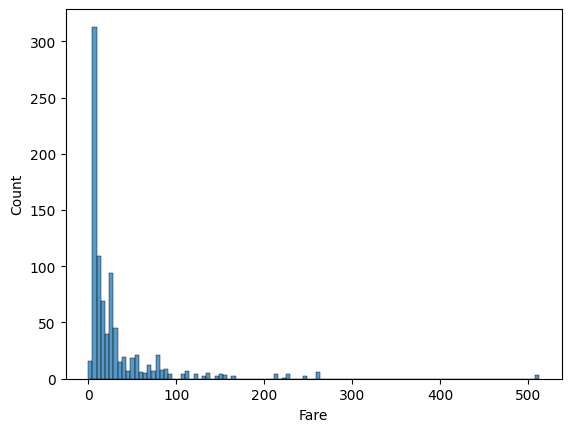

In [14]:
sns.histplot(df, x='Fare');

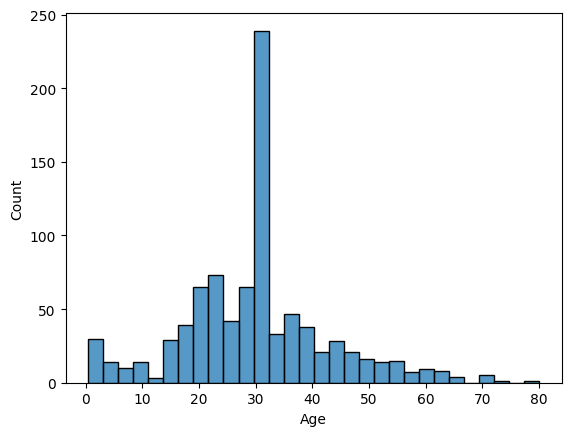

In [15]:
sns.histplot(df, x='Age');

[Text(0, 0.5, '')]

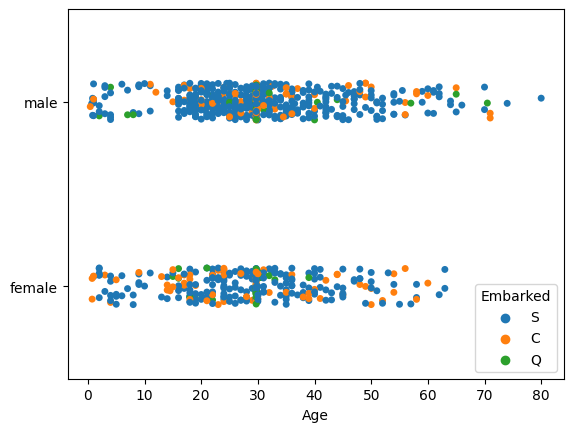

In [16]:
ax = sns.stripplot(data=df, x="Age", y="Sex", hue="Embarked")
ax.set(ylabel="")

C:\Users\Carlos Eduardo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 19.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Carlos Eduardo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[Text(16.722222222222214, 0.5, '')]

C:\Users\Carlos Eduardo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Carlos Eduardo\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


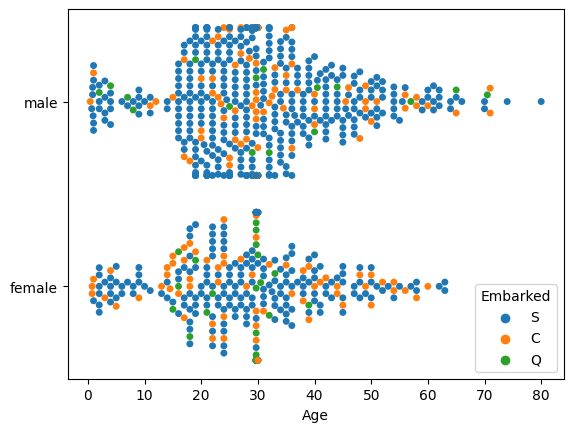

In [17]:
ax = sns.swarmplot(data=df, x="Age", y="Sex", hue="Embarked")
ax.set(ylabel="")

C:\Users\Carlos Eduardo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


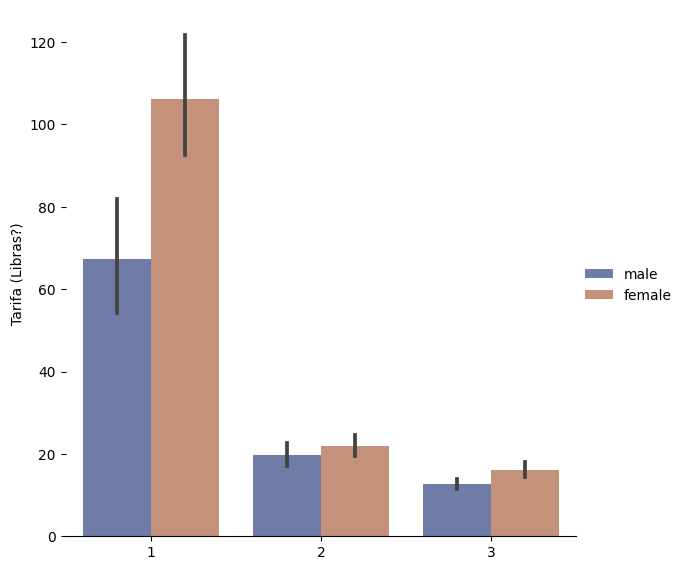

In [18]:
g = sns.catplot(
    data=df, kind="bar",
    x="Pclass", y="Fare", hue="Sex", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Tarifa (Libras?)")
g.legend.set_title("")

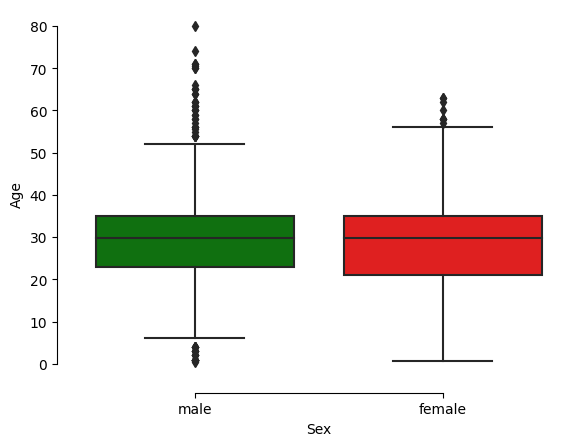

In [19]:
sns.boxplot(x="Sex", y="Age",
            palette=["g", "r"],
            data=df)
sns.despine(offset=10, trim=True)

# Analisando correlações

<Axes: >

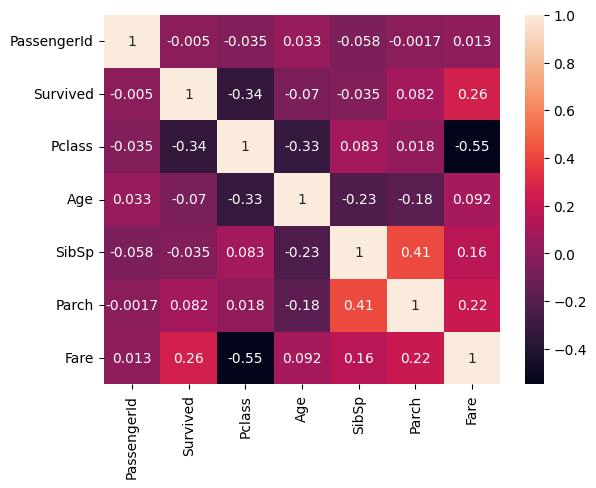

In [20]:
df_numeric = df.select_dtypes(include='number')

sns.heatmap(df_numeric.corr(), annot=True)


#### Conclusão

##### A correlação mais forte que a coluna Survived tem, é com a Fare (Tarifa), ou seja, o tanto que você pagou na passagem pode ter inteligação com o fato da sobrevivência

# Tratamento ou conversão de dados para treinamento do modelo
#### O modelo escolhido nem sempre vai entender o tipo de informação que uma coluna passa. Para um modelo matemático de ML pode não fazer sentido quando ele ver "Male" ou "Female" em uma coluna de Sexo do indivíduo por exemplo. Para contornarmos essa problemática e melhorar a aprendizagem de um modelo de ML podemos aplicar algumas codificações em nossas colunas, afim de reconfigurarmos os dados de modo que fiquem em um formato no qual o modelo possa aprender melhor.

#### Pesquisem sobre LabelEncoder e OneHotEncoder, técnicas utilizadas em ML e Ciência de dados para a nossa problemática de tratamento e conversão de dados.

In [21]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
# Transforma em ordem alfabética os valores apresentados, sendo o primeiro male como 1 e o segundo female como 0

df['Sex'] = labelEncoder.fit_transform(df['Sex'])
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C


# Atividade Final
- Pegar o dataset Titanic, já pré-processado, e dividir as colunas: As que serão utilizadas para o algoritmo KNN identificar os padrões serão colocadas em uma variável 'X' (DataFrame com todas as colunas e linhas dessas colunas), na variável 'y' deverá ser colocada APENAS a coluna ao qual queremos classificar, no nosso caso a coluna 'survived' (a variável será uma Série Pandas)
- Após esta divisão deverá ser importada e aplicada a função train_test_split da biblioteca sklearn para dividir nossas variáveis em DADOS DE TREINO e DADOS DE TESTE. (PROCURE NA INTERNET COMO FUNCIONA A FUNÇÃO E COMO APLICÁ-LA)
- Após dividir em treino e teste, você importa e instancia em uma variável o nosso classificador, o KNN. Utilize também a biblioteca sklearn para importar e instanciar o KNN. (OUTRA PESQUISA NA INTERNET)
- Após instanciar o KNN, treine-o utilizando o a nossa parte do dataset que separamos para treino.
- Após treinado, realize a predição para verificar como o algoritmo está se saindo em dados que nunca viu, no caso, os dados de teste. (GUARDE OS RESULTADOS DA PREDIÇÃO EM UMA VARIÁVEL)
- Após isso basta apenas que importe do sklearn a métrica accuracy_score e utilize ela colocando como entrada o y_test (quando utilizarem o train_test_split entenderão) e os resultados da predição. (NESTE PASSO DEVE SER PRINTADO NA TELA A ACURÁCIA DO SEU MODELO, O QUANTO ELE ACERTA)

In [31]:
#Dividindo os dados
df['Survived']
# x axis
x = df['Fare']
x = pd.DataFrame(x)
x = x.join(df['Pclass'])
##################
# y axis
y = df['Survived']
y = pd.DataFrame(y)
##################
y


,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [35]:
#importando a função train_test_split e instanciando ela
from sklearn.model_selection import train_test_split

#Dividindo as variáveis em dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Importando o KNN e definindo o número de n como 3
knn = KNeighborsClassifier(n_neighbors=3)

In [42]:
# Treinando com as variáveis geradas
knn.fit(x_train,y_train)
# Realizar predição nos dados de teste
y_pred = knn.predict(x_test)

C:\Users\Carlos Eduardo\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [44]:
from sklearn.metrics import accuracy_score

# Calcular a precisão do modelo
accuracy = accuracy_score(y_test,y_pred)

print(f"Precisão do modelo: {accuracy:.2f}")

Precisão do modelo: 0.71


C:\Users\Carlos Eduardo\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Carlos Eduardo\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Carlos Eduardo\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Carlos Eduardo\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_classification.py:228: DataConv

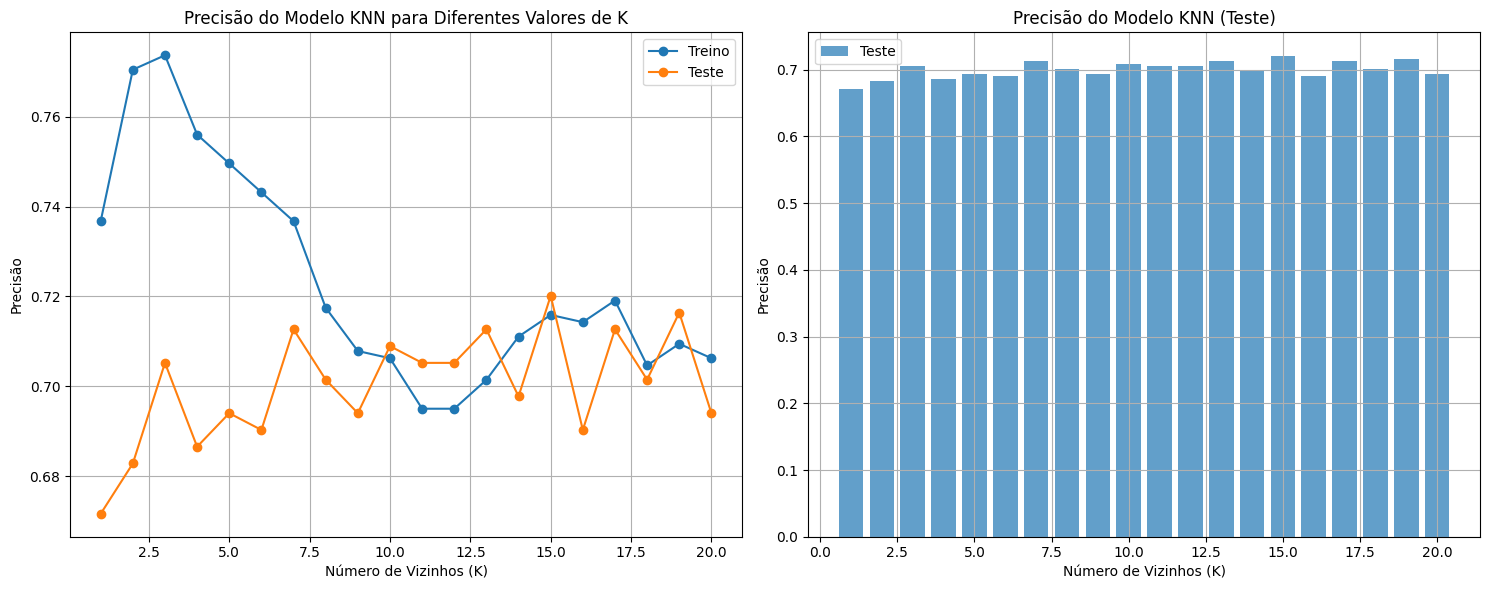

In [52]:
train_scores = []
test_scores = []
for n_neighbors in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y_train)

    # Calcular a acurácia para os dados de treino e teste
    train_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)

    train_scores.append(train_score)
    test_scores.append(test_score)
    

# Criar uma figura com dois eixos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plotar o gráfico de barras de pontuação para os dados de treino
ax1.plot(range(1, 21), train_scores, marker='o', label='Treino')
ax1.plot(range(1, 21), test_scores, marker='o', label='Teste')
ax1.set_xlabel('Número de Vizinhos (K)')
ax1.set_ylabel('Precisão')
ax1.set_title('Precisão do Modelo KNN para Diferentes Valores de K')
ax1.legend()
ax1.grid(True)


# Plotar o gráfico de barras de pontuação para os dados de teste
ax2.bar(range(1, 21), test_scores, label='Teste', alpha=0.7)
ax2.set_xlabel('Número de Vizinhos (K)')
ax2.set_ylabel('Precisão')
ax2.set_title('Precisão do Modelo KNN (Teste)')
ax2.legend()
ax2.grid(True)

# Ajustar o espaçamento entre os gráficos
plt.tight_layout()

# Exibir os gráficos
plt.show()


